# **Random Forest**

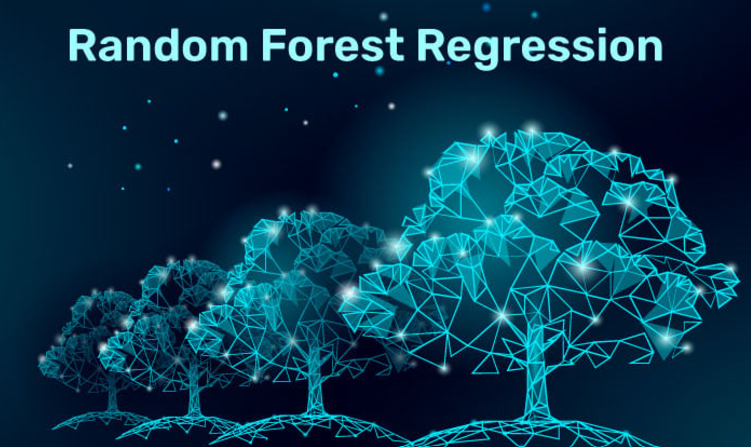
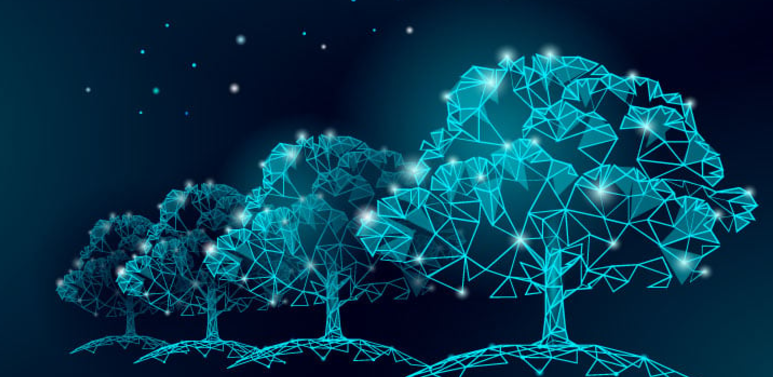

#### Random Forest is a supervised learning algorithm that builds a "forest" of decision trees, each trained on a random subset of the data. This approach helps in reducing overfitting, a common issue with single decision trees, by averaging the results from multiple trees to enhance model stability and accuracy. By aggregating the output of several trees, it reduces overfitting and improves accuracy. Think of it as a diverse team of experts sharing their insights to make better decisions!

# **Step-by-Step Implementation of Random Forest for Regression** on


## **1. Data Preparation**


In [58]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/students-performance-dataset-cleaned/Cleaned_Students_Performance.csv')
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


## **2. Explore the Data:**


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


In [60]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

> ## No Null value found 

## **3. Feature Selection**

In [61]:
# Define features and target variable
X = data.drop(columns=['total_score', 'average_score'])  # Features
y = data['total_score']  # Target variable

In [62]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95
996,1,group C,high school,0,0,62,55,55
997,0,group C,high school,0,1,59,71,65
998,0,group D,some college,1,1,68,78,77


In [63]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## **4. Encoding Categorical Variables:**


In [64]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)
X.columns

Index(['gender', 'lunch', 'test_preparation_course', 'math_score',
       'reading_score', 'writing_score', 'race_ethnicity_group B',
       'race_ethnicity_group C', 'race_ethnicity_group D',
       'race_ethnicity_group E',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_master's degree',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school'],
      dtype='object')

## **5. Split the Data:**



In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## **6. Model Implementation**


In [66]:
# Create a Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [67]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## **7. Model Prediction**


In [68]:
# Make predictions
y_pred = rf_model.predict(X_test)

## **8. Evaluate Performance**

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

Mean Absolute Error: 1.5363999999999995
R-squared Score: 0.9966120512108511


## **9. Visual Representation**

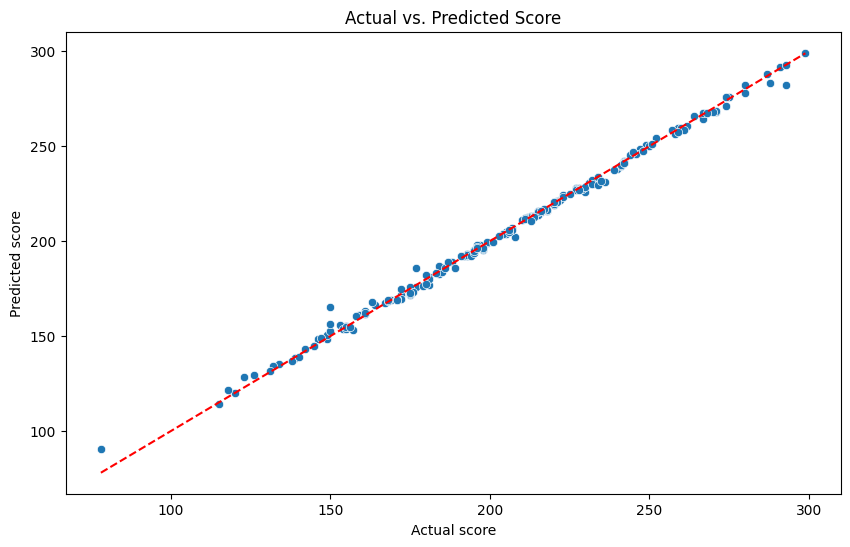

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual score')
plt.ylabel('Predicted score')
plt.title('Actual vs. Predicted Score')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()

## **10. Feature Importance**

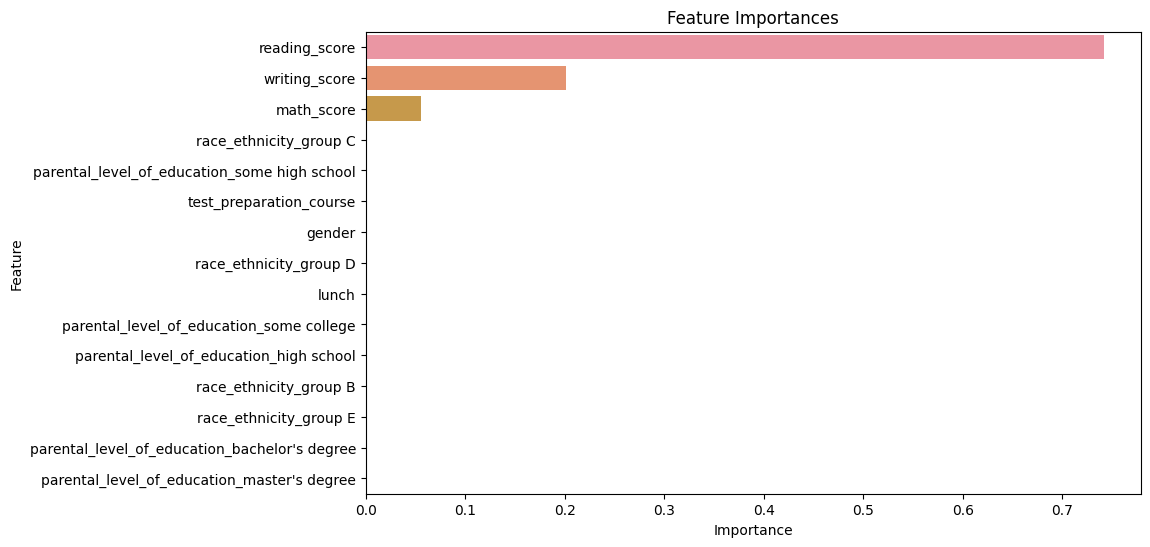

In [71]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()